# Continued Insights on Los Angeles' 311 data for 2020 service requests

Michael Gonzalez

This notebook will be a continued exploration of Los Angeles' 311 data. Once again, I will be looking at the closed status of each requests with the created and serviced dates. The data will be loaded into dataframes and pandas with the datetime libraries. The plots will be created from the seaborn and matplotlib libraries, just like the previous analysis. 

## Brief Overview 

I will need to import useful libraries to timestamp and profile data to discover insights. This project benefited from looking for insights in the closing rate of the open requests. The data is orgainzed and has many useful columns to experiment with new ideas. The focus of this project is on NC 52, which is listed as Downtown Los Angeles. 

In [1]:
# Importing needed libraries.
import pandas as pd
import numpy as np
import pandas_profiling
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Loading the data into a Data Frame.
dfb = pd.read_csv('...\Documents\MyLA311_Service_Request_Data_2020.csv')

# Displaying the top five rows of data.
dfb.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1523593381,01/01/2020 12:02:00 AM,01/07/2020 12:19:00 PM,SR Created,BOS,Illegal Dumping Pickup,Closed,Call,BOS,NaN,...,"(33.988984265, -118.302681205)",673,J,5.0,South Los Angeles APC,8.0,Marqueece Harris-Dawson,81.0,EMPOWERMENT CONGRESS CENTRAL AREA NDC,77TH STREET
1,1-1523590121,01/01/2020 12:05:00 AM,01/02/2020 08:43:00 AM,SR Created,BOS,Illegal Dumping Pickup,Closed,Call,BOS,NaN,...,"(34.1940284578, -118.499471638)",531,D,6.0,South Valley APC,6.0,Nury Martinez,19.0,LAKE BALBOA NC,WEST VALLEY
2,1-1523596201,01/01/2020 12:16:00 AM,01/02/2020 03:13:00 PM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,Android,...,"(34.0117235893, -118.312764174)",673,H,2.0,South Los Angeles APC,8.0,Marqueece Harris-Dawson,77.0,EMPOWERMENT CONGRESS NORTH AREA NDC,SOUTHWEST
3,1-1523596222,01/01/2020 12:19:00 AM,01/03/2020 07:02:00 AM,SR Created,BOS,Bulky Items,Closed,Mobile App,Self Service,Android,...,"(34.0724397675, -118.287797874)",634,A,1.0,Central APC,13.0,Mitch O'Farrell,53.0,RAMPART VILLAGE NC,OLYMPIC
4,1-1523591123,01/01/2020 12:21:00 AM,01/03/2020 03:54:00 PM,SR Created,BOS,Metal/Household Appliances,Closed,Mobile App,Self Service,Android,...,"(34.0724397675, -118.287797874)",634,A,1.0,Central APC,13.0,Mitch O'Farrell,53.0,RAMPART VILLAGE NC,OLYMPIC


## Exploratory Data Analysis 

In this section, I had seen a project that demonstrated the use of timestamp to measure time. Creating new variables that represents the CreatedDate, ClosedDate, and ServiceDate columns for a description of the data.

In [2]:
# Creating a new variable that represents the listed columns with timestamp information.
dfb['CreatedDate'] = pd.to_datetime(dfb['CreatedDate'], errors = 'coerce')
dfb['ClosedDate'] = pd.to_datetime(dfb['ClosedDate'], errors = 'coerce')
dfb['ServiceDate'] = pd.to_datetime(dfb['ServiceDate'], errors = 'coerce')

# Continuing the previous step.
dfb['closed_created'] = dfb.ClosedDate - dfb.CreatedDate
dfb['service_created'] = dfb.ServiceDate - dfb.CreatedDate

dfb.closed_created.describe()

count                    1484526
mean      4 days 20:28:08.875965
std      17 days 07:21:42.497620
min         -3653 days +01:33:17
25%       0 days 18:55:28.250000
50%              1 days 22:18:09
75%       4 days 18:16:04.500000
max            520 days 15:35:43
Name: closed_created, dtype: object

As you can see in the min section of the description. There are negative numbers, which means that it has errors in it. Now it is time to check for other types of measures.

In [3]:
# Checking the data for the sum of null values.
dfb.closed_created.isna().sum()

7247

In [4]:
# Checking the shape of the data.
dfb.shape

(1491773, 36)

In [5]:
# Dropping the NaN and adding new elements to the closed_createdD column.
dfb = dfb[ ~ dfb.closed_created.isna()]
dfb['closed_createdD'] = dfb.closed_created / pd.Timedelta(days = 1)

##  Request types for Downtown Los Angeles

In this section of the notebook. I will again focus on the request types made for Downtown Los Angeles.I will also look for request types that are related to graffiti removal.

In [6]:
# Selecting downtown los angeles and graffiti removal services.
DTLA_Num = dfb.NC[dfb.NCName == 'DOWNTOWN LOS ANGELES'].unique()[0]
nEvents = dfb[(dfb.NC == DTLA_Num) & (dfb.RequestType == 'Graffiti Removal') & (dfb.Status == 'Closed')].CreatedDate.astype('datetime64[D]').value_counts()
df_events = pd.DataFrame(nEvents).reset_index()
df_events.columns = ['date','nEvents']

In [8]:
# Creating new columns that related to the weeks and months of service request.
df52 = dfb[(dfb.NC == DTLA_Num) & (dfb.Status == 'Closed')]
df52['CRweek'] = df52.CreatedDate.dt.week
df52['CRmonth'] = df52.CreatedDate.dt.month

# Creating new dataframes for the weeks and months.
df52_week = pd.DataFrame(df52.groupby(['RequestType','CRweek']).SRNumber.count()).reset_index()
df52_month = pd.DataFrame(df52.groupby(['RequestType','CRmonth']).SRNumber.count()).reset_index()

## Data Visualizations 

In this next section of the notebook. I will talk about the visualization of my results. This will include a comparison of different request types in the Downtown Los Angeles area. The visualizations will display the completion rate of requests related to graffiti removal based on the weeks and months of completion.

[Text(0.5, 1.0, 'Graffiti Removal Requests for Downtown Los Angeles')]

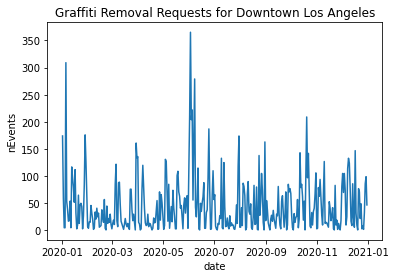

In [11]:
# Plotting a line chart of graffiti requests in downtown los angeles.
ax = sns.lineplot(x = 'date', y = 'nEvents', data = df_events)
line = ax.set(title = 'Graffiti Removal Requests for Downtown Los Angeles')
line

[Text(0.5, 1.0, 'Overall Graffiti Removal Requests for Downtown Los Angeles')]

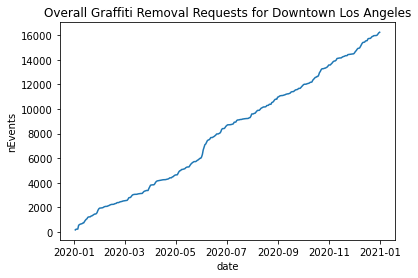

In [12]:
# Plotting another line chart of overall graffiti removal.
df_events = df_events.sort_values('date')
ax = sns.lineplot(x = df_events.date, y = df_events.nEvents.cumsum())
line2 = ax.set(title = 'Overall Graffiti Removal Requests for Downtown Los Angeles')
line2

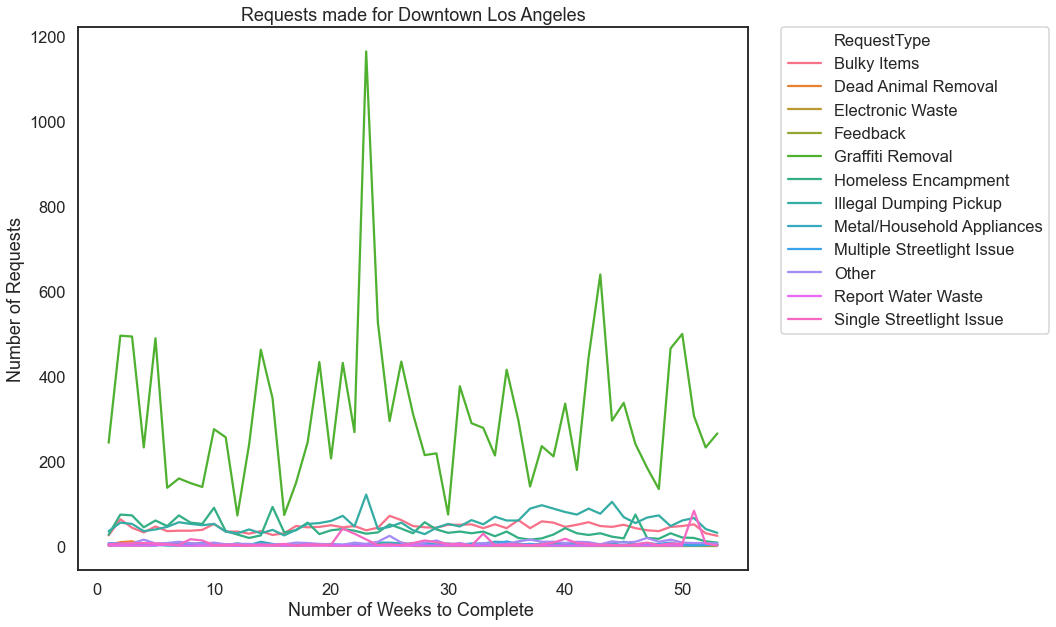

In [13]:
# Plotting a multi-color line chart of different request types completed in weeks.
plt.figure(figsize = (12, 10))
sns.set_style("white")
sns.set_context("talk")
ax = sns.lineplot(x = 'CRweek', y = 'SRNumber', hue = 'RequestType', data = df52_week)
ax.set(xlabel = 'Number of Weeks to Complete ',ylabel = 'Number of Requests', title = 'Requests made for Downtown Los Angeles')
dweeks = plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
dweeks

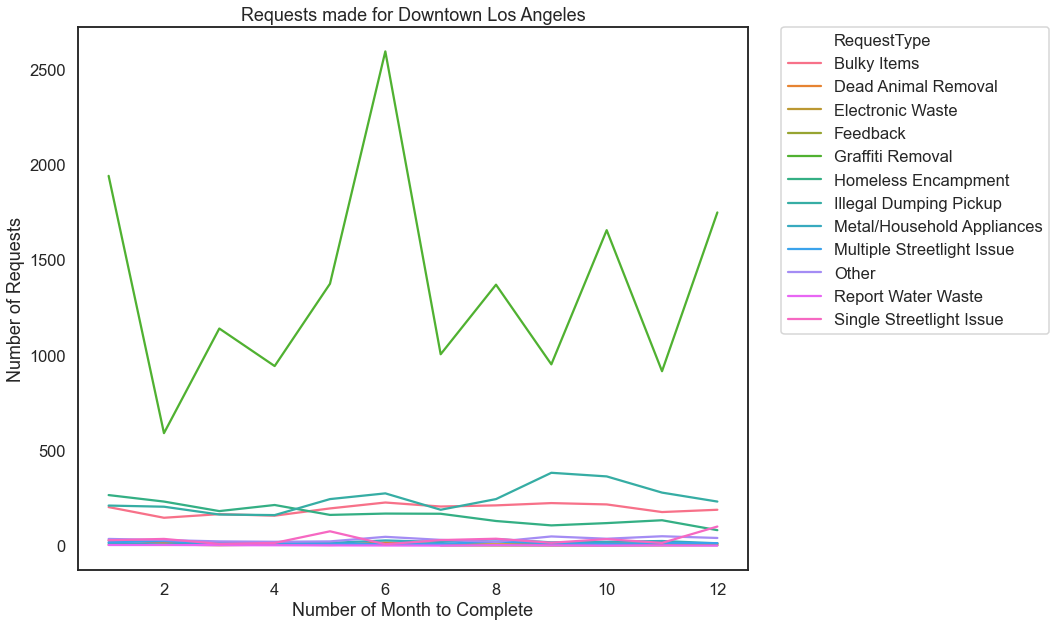

In [15]:
# Plotting another multi-color line chart of different request types completed in months.
plt.figure(figsize = (12, 10))
sns.set_style("white")
sns.set_context("talk")
ax = sns.lineplot(x = 'CRmonth', y = 'SRNumber', hue = 'RequestType', data = df52_month)
ax.set(xlabel = 'Number of Month to Complete', ylabel = 'Number of Requests', title = 'Requests made for Downtown Los Angeles')
dmonths = plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.) 
dmonths

## Conclusion 

In the year 2020, the residents of Downtown Los Angeles requested the services that dealt with graffiti removal. This being an continued look into the 2020 311 dataset. The request for graffiti removal has been growing throughout the years and has exploded over the last year. From looking at the data, it took about six months to closed the graffiti removal request types. This slow completion rate could be due to the pandemic that was slow all the city's resources.